In [ ]:
!pip install pandas plotly

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [ ]:
!pip install plotly-express

In [ ]:
!pip install ipython

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import numpy as np
from pandas.plotting import parallel_coordinates
from scipy.stats import gaussian_kde
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [ ]:
# Load the dataset
file_path = "/content/health_cleaned.csv"
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataframe to ensure it loaded correctly
print(data.head())

   State    District  Population Rural  Population Urban  \
0  Assam     Barpeta             60293              4313   
1  Assam  Bongaigaon             73899             10113   
2  Assam      Cachar            112171             14987   
3  Assam     Dhemaji             66537              8914   
4  Assam      Dhubri             46337              4655   

   Children Received Polio Birth Rural  Children Received Polio Birth Urban  \
0                                 67.2                                 74.5   
1                                 71.9                                 91.7   
2                                 80.1                                 91.3   
3                                 78.5                                 78.6   
4                                 59.1                                 88.3   

   Children Did Not Receive Any Vaccination Rural  \
0                                             4.2   
1                                             3.5   
2    

# Treatment Patterns in Rural and Urban Areas

In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the dataset (assuming the dataset is a CSV file named 'health_cleaned.csv')
df = pd.read_csv("/content/health_cleaned.csv")

# Melt the DataFrame to long format for easier plotting
data_melted = pd.melt(data, id_vars='State',
                    value_vars=['Acute Illness And Treatment From Any Source Rural',
                                'Acute Illness And Taking Treatment From Any Source Urban',
                                'Acute Illness And Taking Treatment From Government Source Person Rural',
                                'Acute Illness And Taking Treatment From Government Person Urban'],
                    var_name='Category', value_name='Percentage')

# Function to split the category correctly
def split_category(category):
    parts = category.rsplit(' ', 2)
    if len(parts) == 3:
        return parts[1:]  # Take last two parts
    elif len(parts) == 2:
        return [parts[0], parts[1]]
    else:
        return [category, '']

# Apply the split function and expand the results into separate columns
data_melted[['Treatment_Type', 'Area']] = pd.DataFrame(data_melted['Category'].apply(split_category).tolist())

# Sort the DataFrame by the 'Percentage' column in ascending order
data_melted_sorted = data_melted.sort_values(by='Percentage', ascending=True)

# Plot the interactive bar chart
fig = px.bar(data_melted_sorted, x='State', y='Percentage', color='Area', barmode='group',
             title='Treatment Patterns in Rural and Urban Areas', labels={'Percentage': 'Percentage of Individuals Receiving Treatment'},
             category_orders={'State': data_melted_sorted['State'].unique()})  # Specify the order of states to maintain original order

fig.update_layout(xaxis_title='State', yaxis_title='Percentage', legend_title='Area')

fig.show()

# Women Awareness of HIV/AIDS in All States

Dropdown(description='Select State for Chart 2', options=('All', 'Assam', 'Bihar', 'Chhattisgarh', 'Jharkhand'…

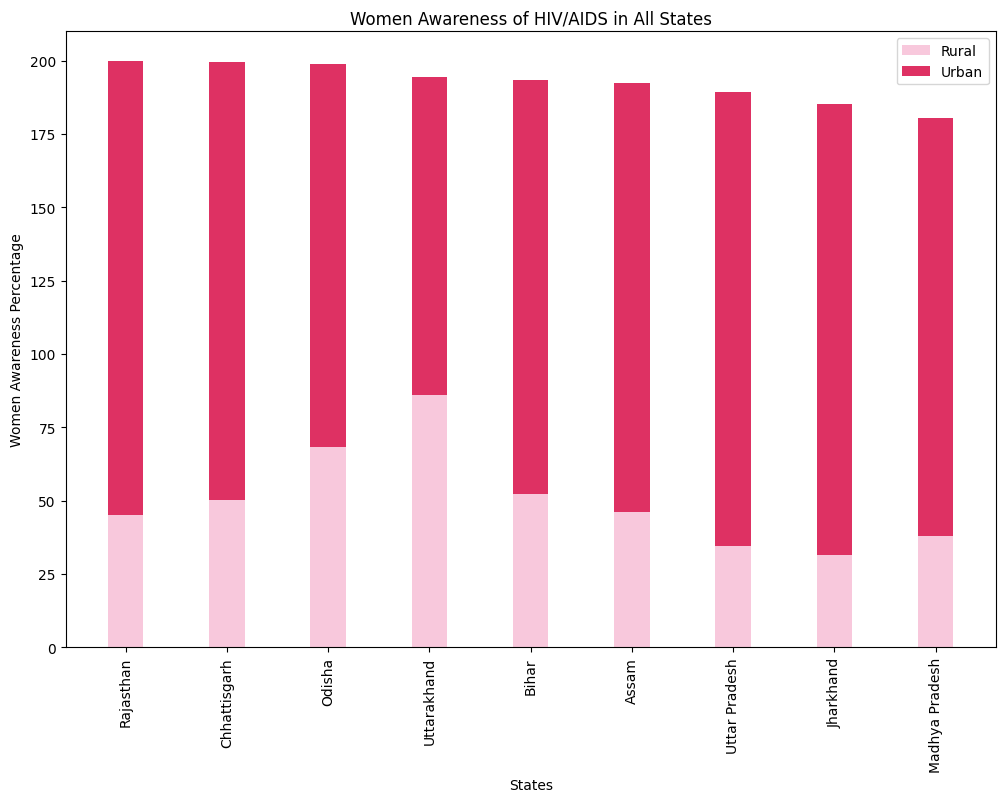

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your dataset
df = pd.read_csv("/content/health_cleaned.csv")

# Create a function to update the bar chart for the second set of variables based on the selected state
def update_chart_2(state, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    if state == "All":
        # Aggregate data for all states and sort by total awareness
        df['TotalAwareness'] = df['Women Aware Of Hiv And Aids Rural'] + df['Women Aware Of Hiv And Aids Urban']
        sorted_df = df.sort_values(by='TotalAwareness', ascending=False)

        rural_data = sorted_df['Women Aware Of Hiv And Aids Rural']
        urban_data = sorted_df['Women Aware Of Hiv And Aids Urban']
        categories = sorted_df['State']

        bar_width = 0.35

        # Plotting the bar chart with custom colors
        colors_rural = ['#F8C8DC'] * len(categories)  # Pink
        colors_urban = ['#DE3163'] * len(categories)  # Purple

        bar1 = plt.bar(categories, rural_data, width=bar_width, color=colors_rural, label='Rural')
        bar2 = plt.bar(categories, urban_data, width=bar_width, color=colors_urban, label='Urban', bottom=rural_data)

        plt.title('Women Awareness of HIV/AIDS in All States')
        plt.xlabel('States')
        plt.ylabel('Women Awareness Percentage')
        plt.ylim(0, 210)  # Adjusted y-axis limit
        plt.xticks(rotation=90)
        plt.legend()
    else:
        # Filter data based on the selected state
        state_data = df[df['State'] == state]

        # Data for plotting
        categories = ['Rural', 'Urban']
        values = [state_data['Women Aware Of Hiv And Aids Rural'].values[0],
                  state_data['Women Aware Of Hiv And Aids Urban'].values[0]]

        # Plotting the bar chart with custom colors
        colors = ['#F8C8DC', '#DE3163']  # Shades of pink and purple
        bars = plt.bar(categories, values, color=colors)

        # Add labels to the bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value}%', ha='center', va='bottom', color='black')

        plt.title(f'Awareness of HIV/AIDS in {state}')
        plt.xlabel('Area')
        plt.ylabel('Awareness Percentage')
        plt.ylim(0, 210)

    plt.show()

# Get unique state names for dropdown and add "All"
state_names_2 = df['State'].unique().tolist()
state_names_2.insert(0, "All")

# Create a dropdown widget for state selection for the second chart
state_dropdown_2 = widgets.Dropdown(options=state_names_2, description='Select State for Chart 2')

# Define an event handler for dropdown changes for the second chart
def dropdown_eventhandler_2(change):
    clear_output(wait=True)  # Clear previous output
    display(state_dropdown_2)
    update_chart_2(change.new, figsize=(12,8))  # Specify the desired size here

state_dropdown_2.observe(dropdown_eventhandler_2, names='value')

# Display the dropdown and initial chart for the second chart
display(state_dropdown_2)
update_chart_2(state_names_2[0], figsize=(12,8))  # Display chart for the first state initially for the second chart


# Women Awareness of RTI/STI in All States

Dropdown(description='Select State for Chart 3', options=('All', 'Assam', 'Bihar', 'Chhattisgarh', 'Jharkhand'…

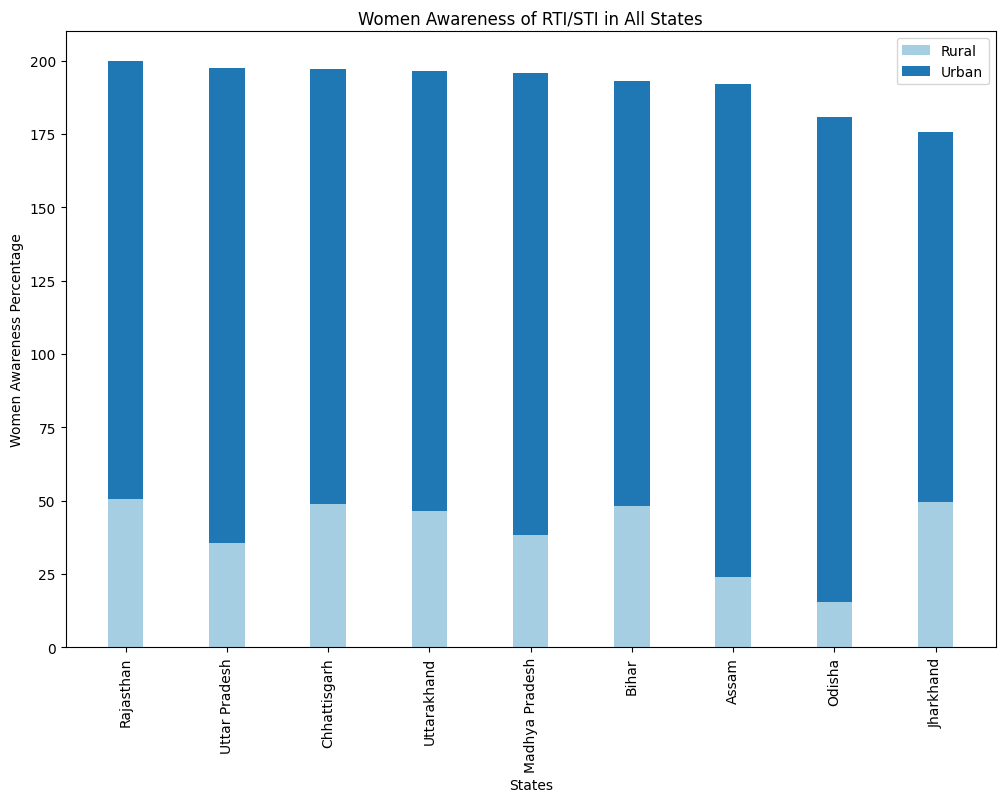

In [ ]:
# Create a function to update the bar chart for the third set of variables based on the selected state
def update_chart_3(state, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    if state == "All":
        # Aggregate data for all states and sort by total awareness
        df['TotalAwareness'] = df['Women Aware Of Rti And Sti Rural'] + df['Women Aware Of Rti And Sti Urban']
        sorted_df = df.sort_values(by='TotalAwareness', ascending=False)

        rural_data = sorted_df['Women Aware Of Rti And Sti Rural']
        urban_data = sorted_df['Women Aware Of Rti And Sti Urban']
        categories = sorted_df['State']

        bar_width = 0.35

        # Plotting the bar chart with custom colors (shades of blue)
        colors_rural = ['#A6CEE3'] * len(categories)  # Light blue
        colors_urban = ['#1F78B4'] * len(categories)  # Dark blue

        bar1 = plt.bar(categories, rural_data, width=bar_width, color=colors_rural, label='Rural')
        bar2 = plt.bar(categories, urban_data, width=bar_width, color=colors_urban, label='Urban', bottom=rural_data)

        plt.title('Women Awareness of RTI/STI in All States')
        plt.xlabel('States')
        plt.ylabel('Women Awareness Percentage')
        plt.ylim(0, 210)  # Adjusted y-axis limit
        plt.xticks(rotation=90)
        plt.legend()
    else:
        # Filter data based on the selected state
        state_data = df[df['State'] == state]

        # Data for plotting
        categories = ['Rural', 'Urban']
        values = [state_data['Women Aware Of Rti And Sti Rural'].values[0],
                  state_data['Women Aware Of Rti And Sti Urban'].values[0]]

        # Plotting the bar chart with custom colors (shades of blue)
        colors = ['#A6CEE3', '#1F78B4']  # Light blue and dark blue
        bars = plt.bar(categories, values, color=colors)

        # Add labels to the bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value}%', ha='center', va='bottom', color='black')

        plt.title(f'Awareness of RTI/STI in {state}')
        plt.xlabel('Area')
        plt.ylabel('Awareness Percentage')
        plt.ylim(0, 210)

    plt.show()

# Get unique state names for dropdown and add "All"
state_names_3 = df['State'].unique().tolist()
state_names_3.insert(0, "All")

# Create a dropdown widget for state selection for the third chart
state_dropdown_3 = widgets.Dropdown(options=state_names_3, description='Select State for Chart 3')

# Define an event handler for dropdown changes for the third chart
def dropdown_eventhandler_3(change):
    clear_output(wait=True)  # Clear previous output
    display(state_dropdown_3)
    update_chart_3(change.new, figsize=(12,8))  # Specify the desired size here

state_dropdown_3.observe(dropdown_eventhandler_3, names='value')

# Display the dropdown and initial chart for the third chart
display(state_dropdown_3)
update_chart_3(state_names_3[0], figsize=(12,8))  # Display chart for the first state initially for the third chart


# Women Awareness of HAF/ORS/ORT/Zinc in All States

Dropdown(description='Select State for Chart 4', options=('All', 'Assam', 'Bihar', 'Chhattisgarh', 'Jharkhand'…

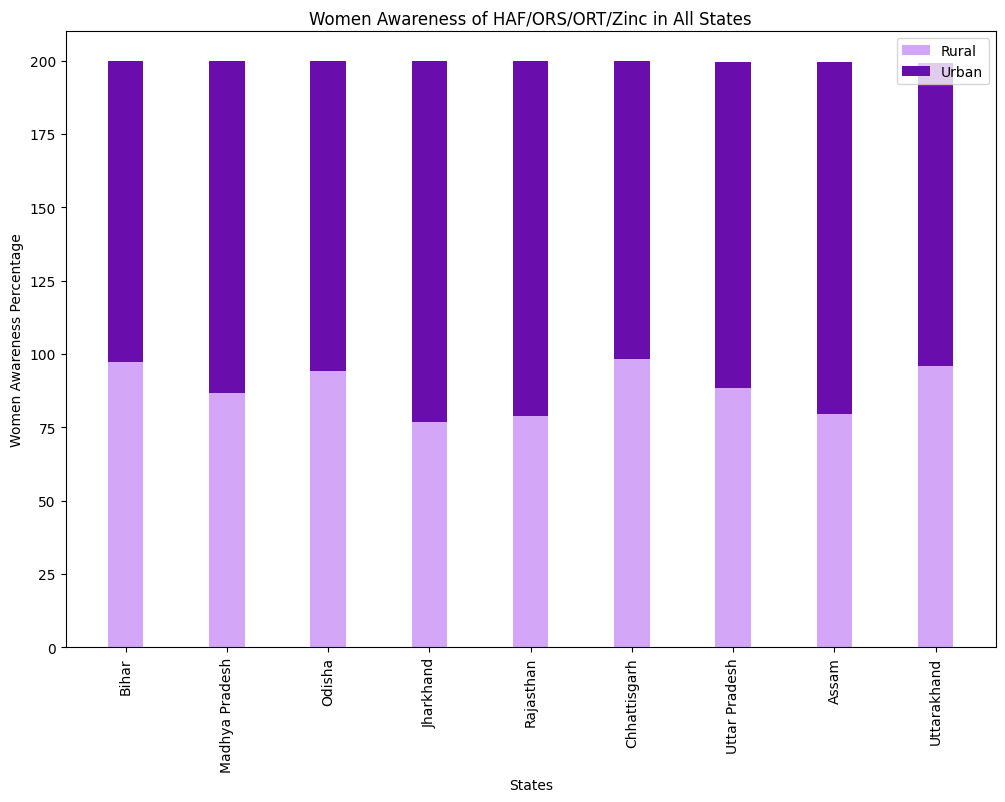

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your dataset
df = pd.read_csv("/content/health_cleaned.csv")

# Create a function to update the bar chart for the fourth set of variables based on the selected state
def update_chart_4(state, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    if state == "All":
        # Aggregate data for all states and sort by total awareness
        df['TotalAwareness'] = df['Women Aware Of Haf Ors And Ort And Zinc And Rural'] + df['Women Aware Of Haf Ors And Ort And Zinc And Urban']
        sorted_df = df.sort_values(by='TotalAwareness', ascending=False)

        rural_data = sorted_df['Women Aware Of Haf Ors And Ort And Zinc And Rural']
        urban_data = sorted_df['Women Aware Of Haf Ors And Ort And Zinc And Urban']
        categories = sorted_df['State']

        bar_width = 0.35

        # Plotting the bar chart with custom colors (shades of purple)
        colors_rural = ['#D4A6F7'] * len(categories)  # Light purple
        colors_urban = ['#6A0DAD'] * len(categories)  # Dark purple

        bar1 = plt.bar(categories, rural_data, width=bar_width, color=colors_rural, label='Rural')
        bar2 = plt.bar(categories, urban_data, width=bar_width, color=colors_urban, label='Urban', bottom=rural_data)

        plt.title('Women Awareness of HAF/ORS/ORT/Zinc in All States')
        plt.xlabel('States')
        plt.ylabel('Women Awareness Percentage')
        plt.ylim(0, 210)  # Adjusted y-axis limit
        plt.xticks(rotation=90)
        plt.legend()
    else:
        # Filter data based on the selected state
        state_data = df[df['State'] == state]

        # Data for plotting
        categories = ['Rural', 'Urban']
        values = [state_data['Women Aware Of Haf Ors And Ort And Zinc And Rural'].values[0],
                  state_data['Women Aware Of Haf Ors And Ort And Zinc And Urban'].values[0]]

        # Plotting the bar chart with custom colors (shades of purple)
        colors = ['#D4A6F7', '#6A0DAD']  # Light purple and dark purple
        bars = plt.bar(categories, values, color=colors)

        # Add labels to the bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value}%', ha='center', va='bottom', color='black')

        plt.title(f'Awareness of HAF/ORS/ORT/Zinc in {state}')
        plt.xlabel('Area')
        plt.ylabel('Awareness Percentage')
        plt.ylim(0, 210)

    plt.show()

# Get unique state names for dropdown and add "All"
state_names_4 = df['State'].unique().tolist()
state_names_4.insert(0, "All")

# Create a dropdown widget for state selection for the fourth chart
state_dropdown_4 = widgets.Dropdown(options=state_names_4, description='Select State for Chart 4')

# Define an event handler for dropdown changes for the fourth chart
def dropdown_eventhandler_4(change):
    clear_output(wait=True)  # Clear previous output
    display(state_dropdown_4)
    update_chart_4(change.new, figsize=(12,8))  # Specify the desired size here

state_dropdown_4.observe(dropdown_eventhandler_4, names='value')

# Display the dropdown and initial chart for the fourth chart
display(state_dropdown_4)
update_chart_4(state_names_4[0], figsize=(12,8))  # Display chart for the first state initially for the fourth chart


# Women Awareness of ARI and Pneumonia in All States

Dropdown(description='Select State for Chart 5', options=('All', 'Assam', 'Bihar', 'Chhattisgarh', 'Jharkhand'…

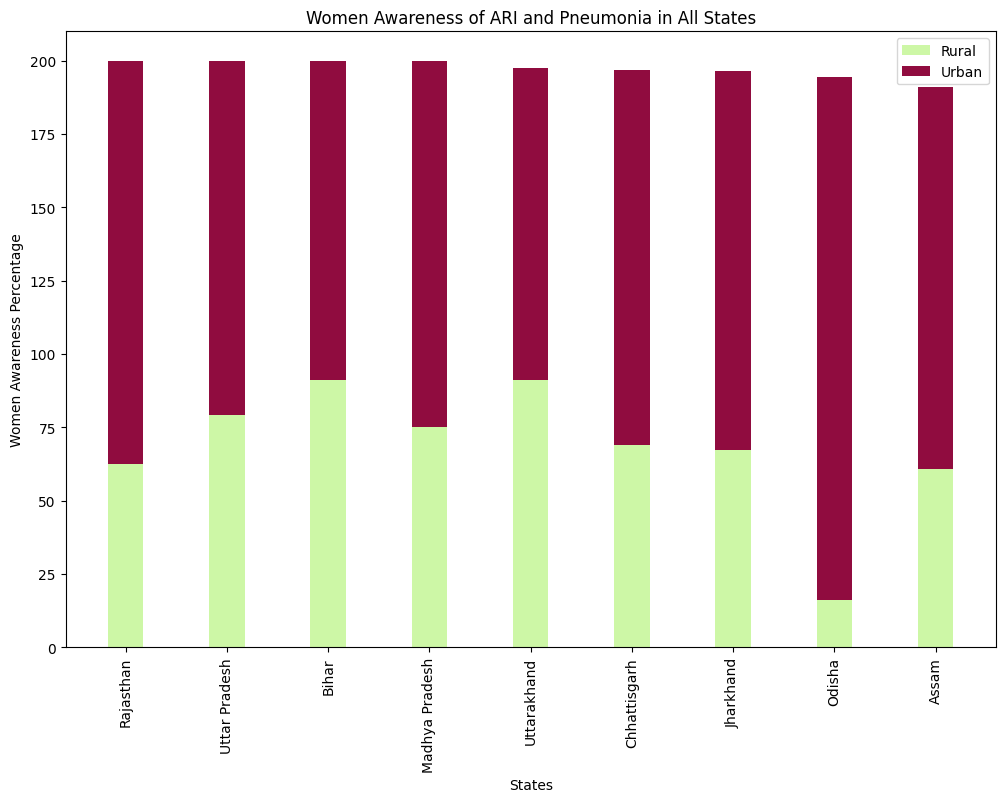

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your dataset
df = pd.read_csv("/content/health_cleaned.csv")

# Create a function to update the bar chart for the fifth set of variables based on the selected state
def update_chart_5(state, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    if state == "All":
        # Aggregate data for all states and sort by total awareness
        df['TotalAwareness'] = df['Women Aware Of Ari And  Pneumonia Rural'] + df['Women Aware Of Ari And  Pneumonia Urban']
        sorted_df = df.sort_values(by='TotalAwareness', ascending=False)

        rural_data = sorted_df['Women Aware Of Ari And  Pneumonia Rural']
        urban_data = sorted_df['Women Aware Of Ari And  Pneumonia Urban']
        categories = sorted_df['State']

        bar_width = 0.35

        # Plotting the bar chart with custom colors (shades of coral)
        colors_rural = ['#cdf7a6'] * len(categories)  # Light coral
        colors_urban = ['#900C3F'] * len(categories)  # Dark coral

        bar1 = plt.bar(categories, rural_data, width=bar_width, color=colors_rural, label='Rural')
        bar2 = plt.bar(categories, urban_data, width=bar_width, color=colors_urban, label='Urban', bottom=rural_data)

        plt.title('Women Awareness of ARI and Pneumonia in All States')
        plt.xlabel('States')
        plt.ylabel('Women Awareness Percentage')
        plt.ylim(0, 210)  # Adjusted y-axis limit
        plt.xticks(rotation=90)
        plt.legend()
    else:
        # Filter data based on the selected state
        state_data = df[df['State'] == state]

        # Data for plotting
        categories = ['Rural', 'Urban']
        values = [state_data['Women Aware Of Ari And Pneumonia Rural'].values[0],
                  state_data['Women Aware Of Ari And Pneumonia Urban'].values[0]]

        # Plotting the bar chart with custom colors (shades of coral)
        colors = ['#cdf7a6', '#900C3F']  # Light coral and dark coral
        bars = plt.bar(categories, values, color=colors)

        # Add labels to the bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{value}%', ha='center', va='bottom', color='black')

        plt.title(f'Awareness of ARI and Pneumonia in {state}')
        plt.xlabel('Area')
        plt.ylabel('Awareness Percentage')
        plt.ylim(0, 210)

    plt.show()

# Get unique state names for dropdown and add "All"
state_names_5 = df['State'].unique().tolist()
state_names_5.insert(0, "All")

# Create a dropdown widget for state selection for the fifth chart
state_dropdown_5 = widgets.Dropdown(options=state_names_5, description='Select State for Chart 5')

# Define an event handler for dropdown changes for the fifth chart
def dropdown_eventhandler_5(change):
    clear_output(wait=True)  # Clear previous output
    display(state_dropdown_5)
    update_chart_5(change.new, figsize=(12,8))  # Specify the desired size here

state_dropdown_5.observe(dropdown_eventhandler_5, names='value')

# Display the dropdown and initial chart for the fifth chart
display(state_dropdown_5)
update_chart_5(state_names_5[0], figsize=(12,8))  # Display chart for the first state initially for the fifth chart


# Urban vs Rural Non-Vaccination by District


In [ ]:

df = pd.read_csv("/content/health_cleaned.csv")
# Combine the urban and rural non-vaccination columns for total non-vaccinated children
df['Total Children Not Vaccinated'] = df['Children Did Not Receive Any Vaccination Urban'] + df['Children Did Not Receive Any Vaccination Rural']

# Ensure the data types are correct
df['State'] = df['State'].astype(str)
df['District'] = df['District'].astype(str)

sns.set_style("whitegrid")

import plotly.express as px

# Scatter plot showing non-vaccination status in urban and rural areas
fig = px.scatter(df, x='Children Did Not Receive Any Vaccination Urban', y='Children Did Not Receive Any Vaccination Rural',
                 color='State', size='Total Children Not Vaccinated', hover_name='District',
                 title='Urban vs Rural Non-Vaccination by District')

# Show the plot
fig.show()

# Density Plot of Fever Cases by Gender and Area

In [ ]:
# Select the columns of interest

variables_of_interest = ['Fever Male Rural', 'Fever Male Urban','Fever Femal Rural', 'Fever Female Urban']

<ipython-input-18-c77be3d988cd>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-18-c77be3d988cd>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-18-c77be3d988cd>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-18-c77be3d988cd>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




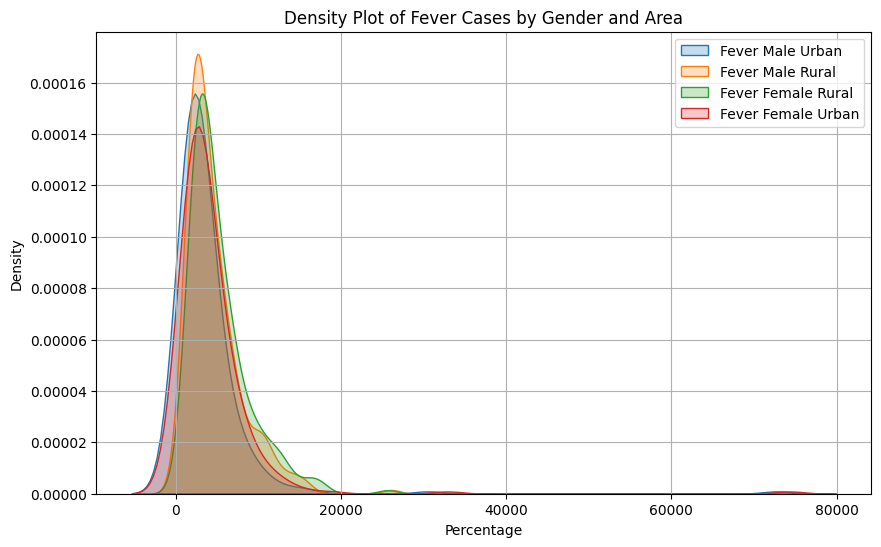

In [ ]:
data_selected = data[["Fever Male Urban", "Fever Male Rural", "Fever Female Rural", "Fever Female Urban"]]

# Handle any missing or non-numeric values if present
data_selected = data_selected.apply(pd.to_numeric, errors='coerce')
data_selected = data_selected.dropna()

# Plotting the density plot
plt.figure(figsize=(10, 6))
for column in data_selected.columns:
    sns.kdeplot(data_selected[column], label=column, shade=True)

plt.title('Density Plot of Fever Cases by Gender and Area')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Children received polio birth by State both in rural and urban area


In [ ]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.io as pio

# Set Plotly renderer for Google Colab
pio.renderers.default = 'colab'

# Load the dataset
file_path = "/content/health_cleaned.csv"
df = pd.read_csv(file_path)

# Ensure no infinite values exist in the DataFrame
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Function to create and display the plot
def create_boxplot(variable):
    clear_output(wait=True)  # Clear the output area
    fig = px.box(df, x='State', y=variable, title=f'Box Plot of {variable} by State', labels={variable: variable}, hover_data=['District'])
    fig.show()

# Create a dropdown widget to select the variable
variable_dropdown = widgets.Dropdown(
    options=['Children Received Polio Birth Rural', 'Children Received Polio Birth Urban'],
    value='Children Received Polio Birth Rural',
    description='Variable:',
    disabled=False,
)

# Display the initial plot
create_boxplot(variable_dropdown.value)

# Attach the update function to the dropdown
variable_dropdown.observe(lambda change: create_boxplot(change['new']), names='value')

# Display the dropdown
display(variable_dropdown)

Dropdown(description='Variable:', options=('Children Received Polio Birth Rural', 'Children Received Polio Bir…

# Relationship Between Acute Illness Male Rural and Urban & Acute Illness Female Rural & Urban


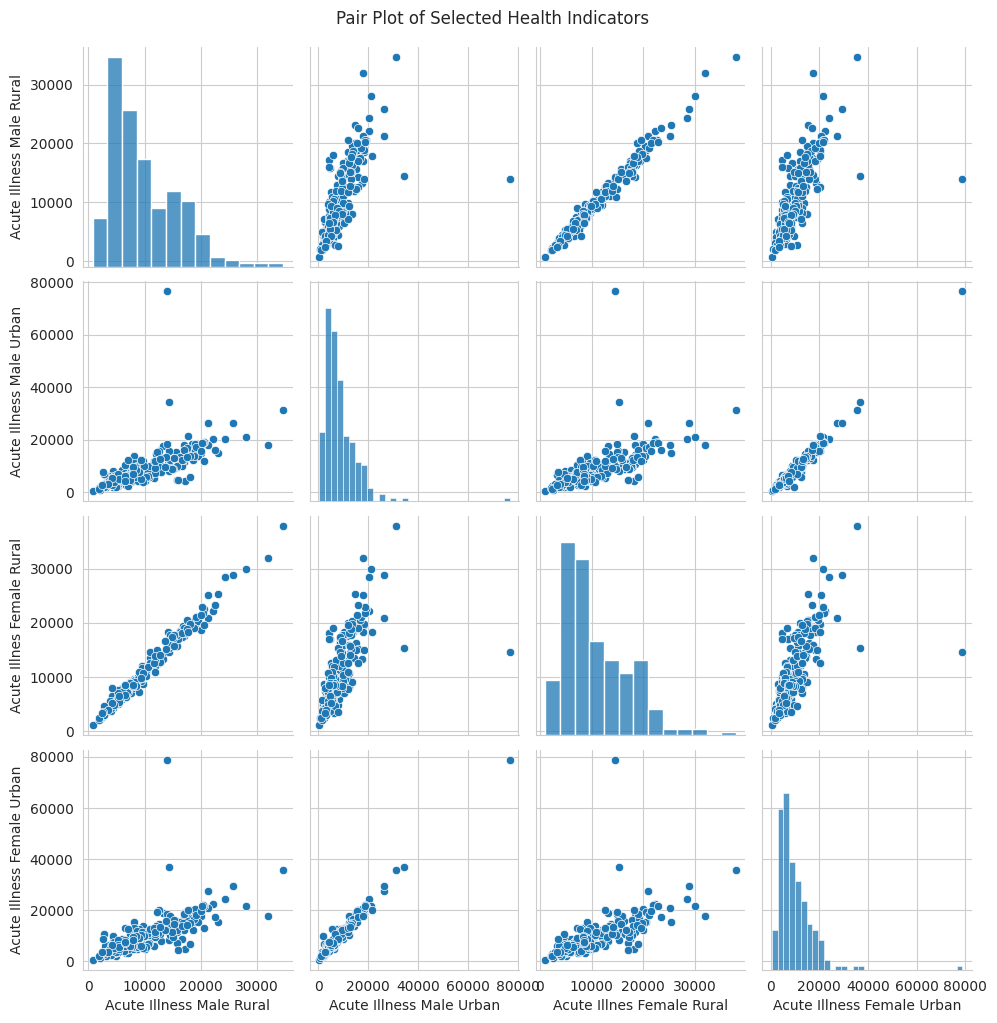

In [ ]:

df = pd.read_csv("/content/health_cleaned.csv")
# Select relevant columns for the pair plot
selected_columns = ['Acute Illness Male Rural', 'Acute Illness Male Urban',
                    'Acute Illnes Female Rural', 'Acute Illness Female Urban']

# Create pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Health Indicators', y=1.02)
plt.show()

# Diarrhoea and Dysentery by district

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Load the data
df = pd.read_csv("/content/health_cleaned.csv")

# Ensure the columns are numeric
columns_to_convert = [
    'Diarrhoea Dysentery Male Rural',
    'Diarrhoea Dysentery Female Rural',
    'Diarrhoea Dysentery Male Urban',
    'Diarrhoea Dysentery Female Urban'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column].replace(',', '', regex=True), errors='coerce')

# Define a function to generate a random color palette
def generate_random_colors(n):
    colors = []
    for _ in range(n):
        colors.append("#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]))
    return colors

# Dictionary to store color palettes for each district
district_colors = {}

def plot_pie_chart(district_name):
    # Get the index of the selected district
    district_index = df[df['District'] == district_name].index[0]
    male_rural = df['Diarrhoea Dysentery Male Rural'][district_index]
    female_rural = df['Diarrhoea Dysentery Female Rural'][district_index]
    male_urban = df['Diarrhoea Dysentery Male Urban'][district_index]
    female_urban = df['Diarrhoea Dysentery Female Urban'][district_index]

    # Generate or retrieve the color palette for the selected district
    if district_name not in district_colors:
        district_colors[district_name] = generate_random_colors(4)
    colors = district_colors[district_name]

    # Create pie chart
    labels = ['Male Rural', 'Female Rural', 'Male Urban', 'Female Urban']
    sizes = [male_rural, female_rural, male_urban, female_urban]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Diarrhoea and Dysentery Distribution in {district_name}')

    plt.axis('equal')
    plt.show()

# Create a dropdown menu for selecting district
districts = df['District'].unique()
dropdown = widgets.Dropdown(options=districts, description='District')

# Use interact to create an interactive plot
interact(plot_pie_chart, district_name=dropdown)


interactive(children=(Dropdown(description='District', options=('Barpeta', 'Bongaigaon', 'Cachar', 'Dhemaji', …

<function __main__.plot_pie_chart(district_name)>